# Support Vector Machine

* Supervised learning
* Support vector is data point to find decision boundary
* To classify new data, check decision boundary
* 2 blue data point, 1 green data point are support vector
* Red line is decision boundary

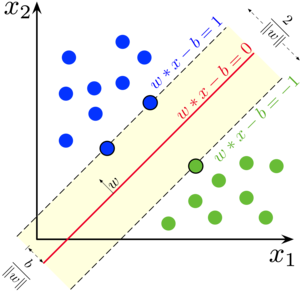

* There are 2 parameters
    1. Cost
           adjust margin width, when cost is big, margin width is small
    2. Gamma
           adjust standard deviation variable, when gamma is small, data point impact is big, So makes smooth boundary 

## Content
1. [Data Exploration](#one)
2. [Find Parameters](#two)
3. [Check with visualization](#three)
4. [Model Test](#four)

<hr>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('../input/basketball/basketball_stat.csv')

<a id="one"></a>

# 1. Data Exploration

<hr>

In [3]:
train.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


## Feature explanation
* Player = name
* Pos = Position
* 3p = 3 point
* 2p = 2 point
* TRB = Rebound
* AST = Assist
* STL = Steal
* BLK = Block

<a id="two"></a>

# 2. Find Parameters

<hr>

We will use GridSearchCv from sklearn to get best parameters

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [5]:
def svc_param_selection(X,y,nfolds) :
    svm_parameters = [
        {'kernel':['rbf'],
         'gamma':[0.00001,0.0001,0.001,0.01,0.1,1],
         'C':[0.01,0.1,1,10,100,1000]
        }]
    
    
    clf = GridSearchCV(SVC(), svm_parameters,cv=10)
    clf.fit(X_train,y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

We try to predict position with 3P and BLK data

In [6]:
X_train = train[['3P','BLK']]
y_train = train[['Pos']]

In [7]:
clf = svc_param_selection(X_train,y_train.values.ravel(),10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


<a id="three"></a>

# 3. Check with visualization
<hr>

Make candidates for visualization

In [8]:
C_candidates = []
C_candidates.append(clf.best_params_['C']*0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C']*100)

In [9]:
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma']*0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma']*100)

In [10]:
X = train[['3P','BLK']]
Y = train['Pos'].tolist()

In [11]:
position = []
for gt in Y :
    if gt == 'C' :
        position.append(0) # if position is center ,  0 labeling
    else:
        position.append(1) # if position is shooting guard , 1 labeling

        classifiers =[]
        
for C in C_candidates :
    for gamma in gamma_candidates :
        clf = SVC(C=C,gamma=gamma)
        clf.fit(X,Y)
        classifiers.append((C,gamma,clf)) # record trained model with parameters candidate

plt.figure(figsize=(18,18))
xx, yy = np.meshgrid(np.linspace(0,4,100),np.linspace(0,4,100))

for (k,(C,gamma,clf)) in enumerate(classifiers) :
    Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_candidates), k+1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
             size='medium')
    
    plt.pcolormesh(xx,yy,-Z,cmap=plt.cm.RdBu)
    plt.scatter(X['3P'],X['BLK'],c=position,cmap=plt.cm.RdBu_r,
               edgecolors='k')

NameError: name 'C_canditates' is not defined

<Figure size 1296x1296 with 0 Axes>

(2,2) chart is svm model with C and gamma we got from gridsearch
We can find out that classify well

When we compare with row, we can check difference from gamma
When we compare with columns, we can check difference from C

<a id="four"></a>

# 4. Model Test

<hr>

In [12]:
X_test = train[['3P','BLK']]
y_test = train[['Pos']]

y_true, y_pred = y_test, clf.predict(X_test)

comparison = pd.DataFrame({'prediction' : y_pred,
                          'ground_truth': y_true.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,C,C
3,C,C
4,SG,SG
...,...,...
95,C,C
96,C,SG
97,SG,SG
98,C,C


## Reference

[My first machine-learning/deep-learning by Minsuk Heo](https://github.com/wikibook/machine-learning/tree/master/data)

[Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)